# **Sales Price Correlation Notebook**


 ## Objectives

  * Answer business requirement 1:

   * The client is interested in understanding the relationship between the attributes of a house and its sale price.
     Therefore, the client can learn and visualize the most relevant variables that are correlated to sales price.
   * We will explore the data using Pandas profiling
   * Determine if the dataset is normally distributed, and make necessary adjustments

 ## Inputs

   * outputs/datasets/collection/HousePricesRecords.csv 

 ## Outputs

   * Report from the Pandas Profile dataset
   * Generate code and plot graphs that answers business requirement 1 and can be used to build the Streamlit App

 ## Additional Comments

   * Here will use the report generated from the Pandas Profile to determine the variables proportion.

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

# Load data

We load the dataset output from the Data Collection notebook

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv"))
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

## Data Exploration With Panda Profile Report

Data Exploration Check each variable to understand more information about the data set, by using Pandas profiling.

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The Panda profile Report indicate:
* The dataset have a predominance of numerical variables.
* We have 4 categorical and 20 numerical variables
* Some variables having high level of missing data with "EnclosedPorch" and "WoodDeckSF" having the most missing data of 90.7% and 89.4% respectively.
* The SalePrice has a positive skewed distribution.

## Import Packages

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import ppscore as pps

## Distribution Analysis

* We plot a distribution for each column

In [7]:
df.select_dtypes(include='object').describe(include='all')

,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual
count,1460,1346,1298,1460
unique,5,7,4,4
top,No,Unf,Unf,TA
freq,953,396,546,735


We plot the categorical data in bar plots to visualize the univariate distribution

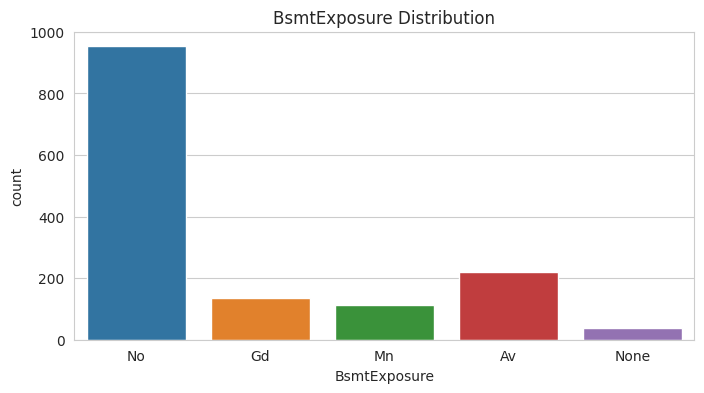

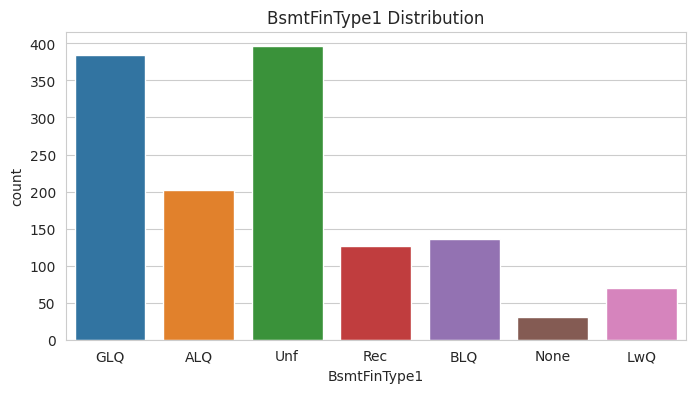

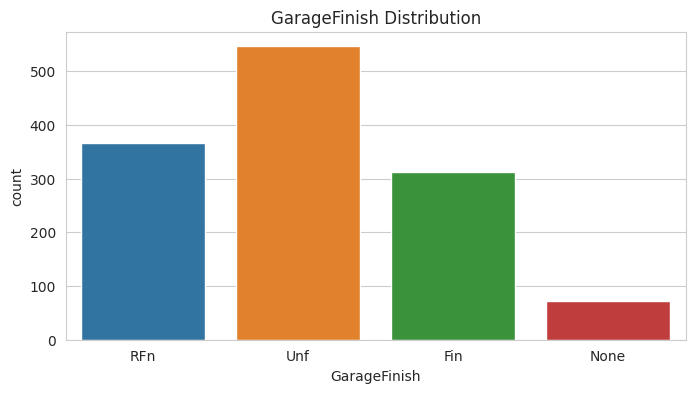

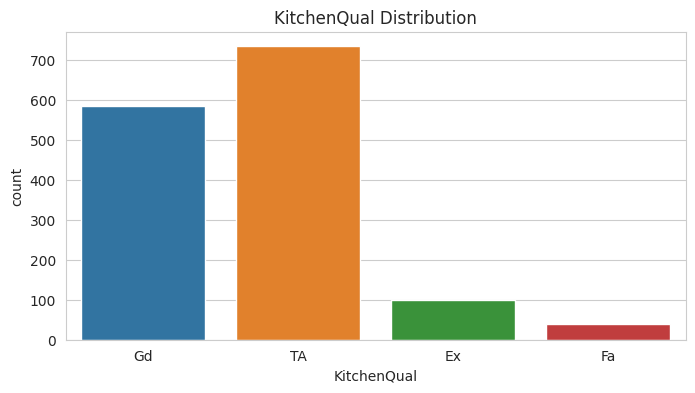

In [8]:
for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=col)
  plt.title(f"{col} Distribution")
  plt.show()
  print("\n")

* We assess the numerical distribution plot to check the distribution level.
* To assertain if we should impute the mean or the median?
* We will loop over each DataFrame column, create a figure and plot a histogram using `sns.histplot()`

The numerical distribution analysis shows some of the variables are not normally distributed (bell curve shape), therefore the missing values will be replace with the mean, or otherwise replaced with median in the data cleaning notebook.

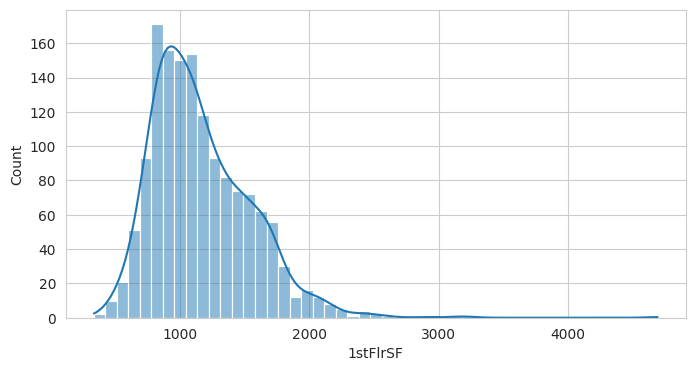

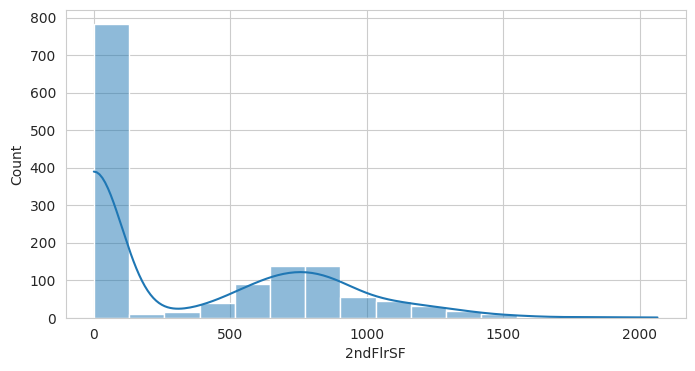

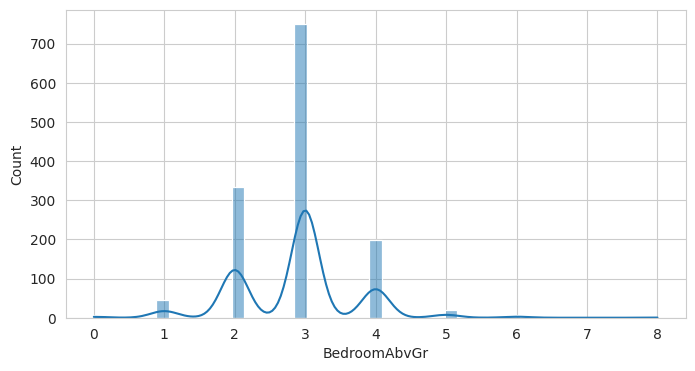

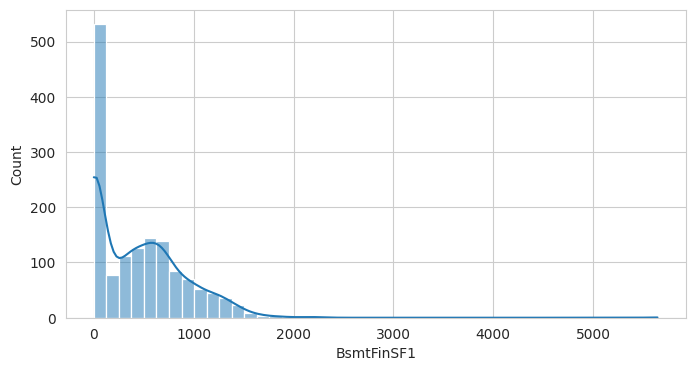

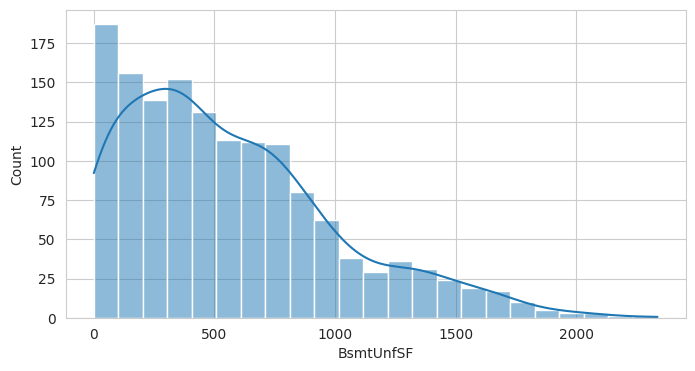

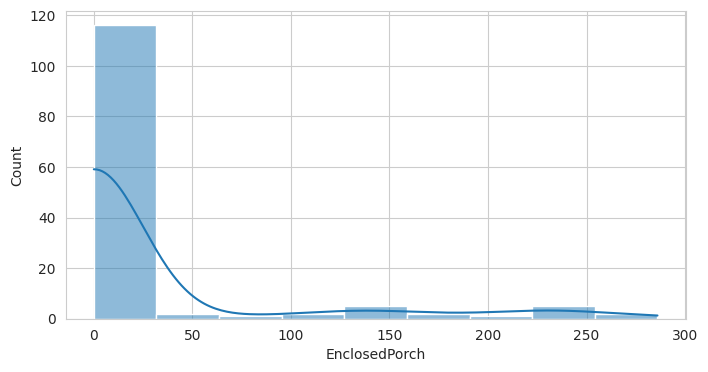

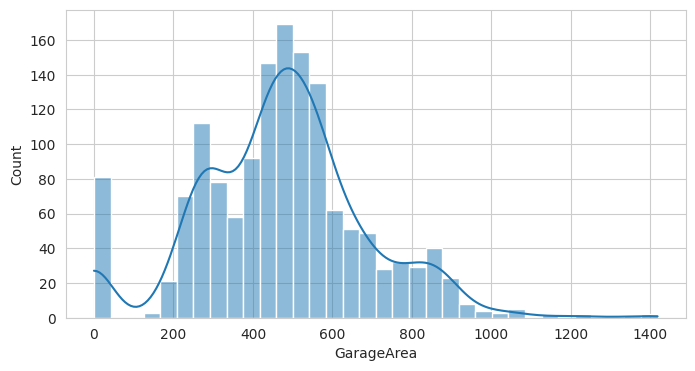

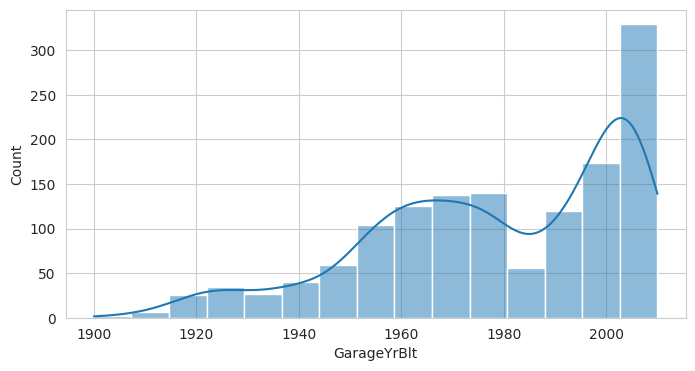

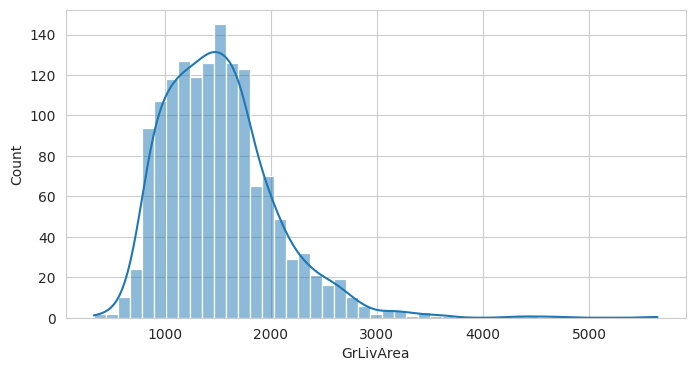

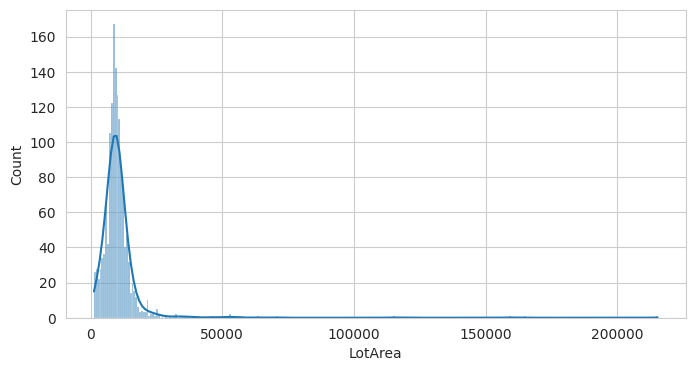

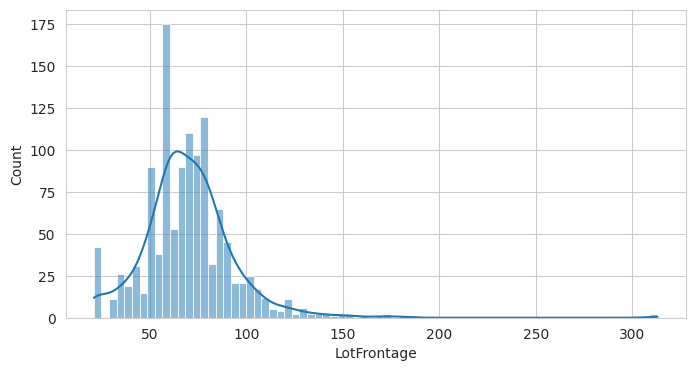

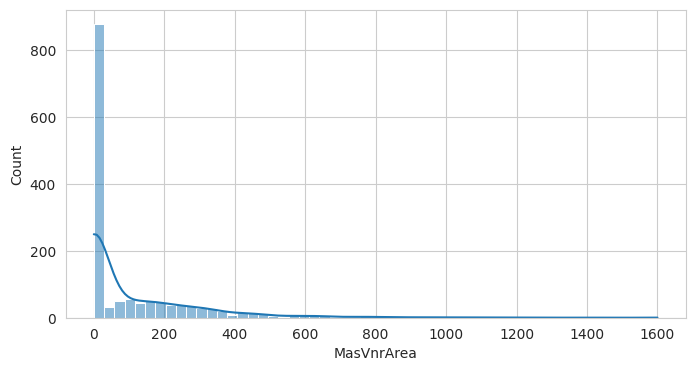

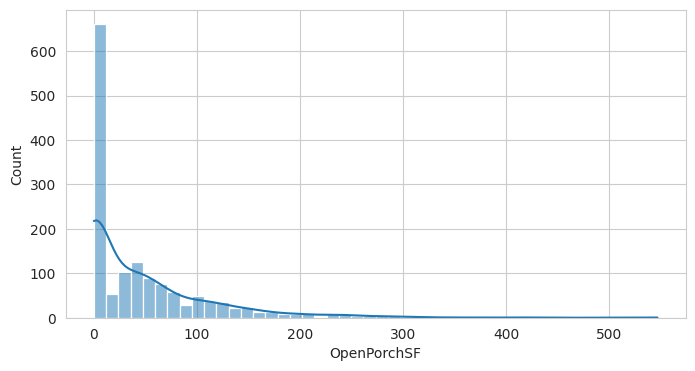

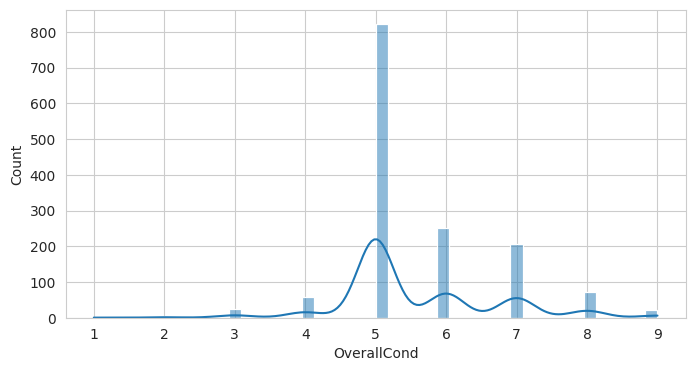

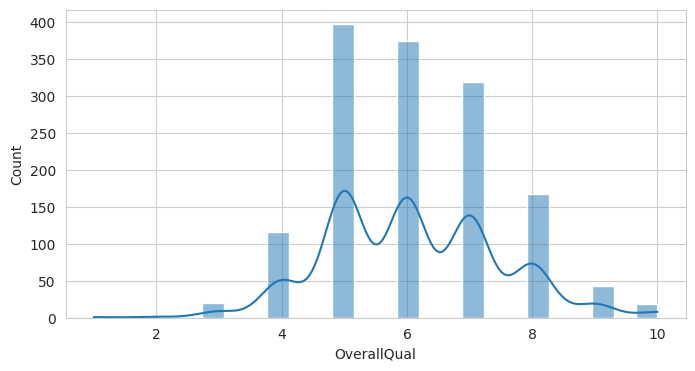

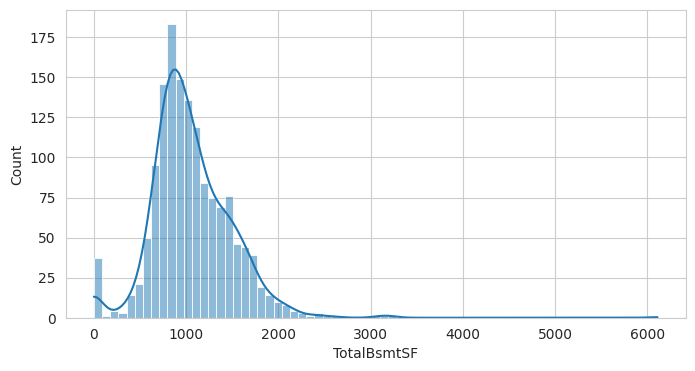

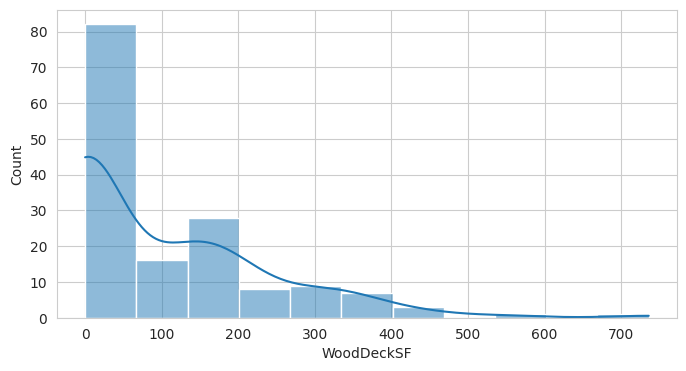

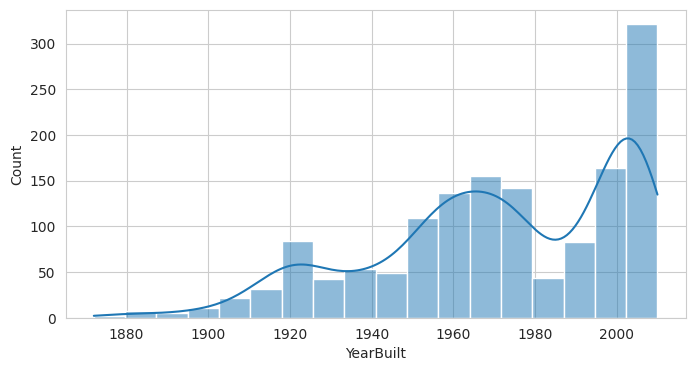

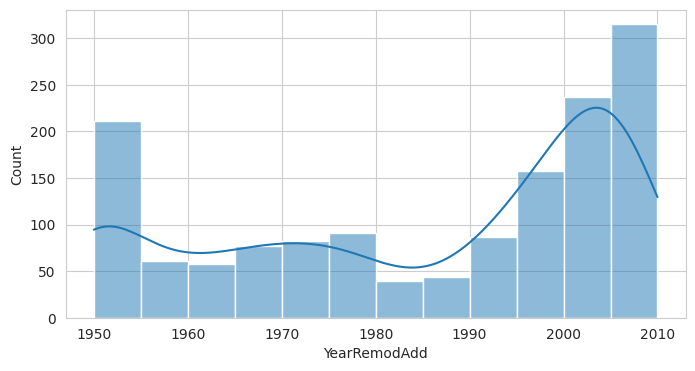

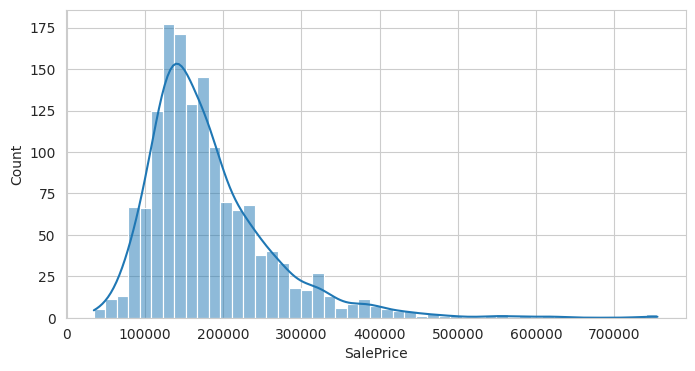

In [9]:
for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, kde=True)
  plt.show();
  print("\n\n")

## Correlation Study

We will be exploring the combine Correlation Study and Predictive Power Score (PPS) to analyse how Sale price correlates to the variables

A custom functions where a combined correlation analysis (Pearson and Spearman) and PPS is used
Hence, there will be need to call two functions:
* `CalculateCorrAndPPS()`: calculate correlation tables and PPS table for a dataset. Then prints Q1 and Q3 for PPS scores
* `DisplayCorrAndPPS()`: which takes the following arguments; `df_corr_pearson`, `df_corr_spearman`, `pps_matrix` and the visualization threshold  for correlations and PPS (`CorrThreshold` and `PPS_Threshold`) respectively.
* We build heatmaps for PPS and Pearson and Spearman correlation

* Note: The custom functions was taken from the Code Institute lesson on Exploratory Data Analysis Tools on "Predictive Power Score Unit 1".

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Call CalculateCorrAndPPS to calculate the Correlation levels and PPS Scores in the  matrix

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

The PPS threshold shows there is strong predictive power in range of 0 and 0.6. The correlation threshold set to 0.6 (strong correlation) and a PPS threshold of 0.15, which I think is a moderate correlation threshold.

Heatmaps display

In [ ]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.6, PPS_Threshold =0.15,
                  figsize=(12,10), font_annot=10)

The client wants to discover how the house attributes correlate with the sale price. The analysis from the CorrelationPlots are as follows: 

* Spearman correlation:  suggests that Sales Price has moderate Correlation with GarageArea, TotalBsmtSF, YearBuilt and YearBuilt and Sales Price have strong monotonic relationships with GrLivArea and OverallQual.

* Pearson correlation: Plot shows that OverallQual, GrLivArea, GarageArea, 1stFlrSF and TotalBsmtSF have strong to moderate linear relationships with Sales Price.
  * 1stFlrSF shows high correlation level with TotalBsmtSF
  * GarageYrBlt shows high correlation level with YearBuilt

* PPS Heatmap: A PPs greater than 0.2 is generally means a strong predictive power. The Plot shows that KitchenQual OverallQual and YearBuilt have strong predictive power with Sales Price, while GarageArea and GarageFinish having some predictive power but weak. 

We will consider the following variables for dataframe based on the PPS and correlation level: '1stFlrSF', 'GarageArea', 'GrLivArea', 'KitchenQual', 'TotalBsmtSF', 'OverallQual', 'YearBuilt' 

In [ ]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'KitchenQual', 'TotalBsmtSF', 'OverallQual', 'YearBuilt' ]
vars_to_study

We create a Dataframe for the Selected Variables for study with the SalesPrice

In [ ]:
df_to_study = df.filter(vars_to_study + ['SalePrice'])
df_to_study.head()

## Variables distribution by Sale Price

We plot a Scatter graph for each selected variable against our target (SalePrice). 
* Note: Code was adapted from the Code Institute Churnometer Walkthrough Project.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_scatter(df, col, target_var):

    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y=target_var)
    plt.title(f"{col} Correlation To Sales Price", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_scatter(df_to_study, col, target_var)
    print("\n\n")

Analysis of the Scatter plot above, couple with the Correlation and PPS analysis, we were able to draw the following insight:

* 1stFlrSF (First Floor square feet): Shows that houses on first-floor with large square feet have a positive correlation and  often yield a higher selling price.

* GarageArea (Size of garage in square feet): There's a good level of correlation between a large garage area and a higher selling price. 

* GrLivArea (Above grade (ground) living area square feet): Houses with high grade, large and above-ground living space area often yeild higher selling prices.

* kitchenQual (Kitchen quality): Houses with excellent rating for its kitchen quality generally correlates with a higher selling price. 

* OverallQual (Rates the overall material and finish of the house): Houses with higher rating for overall quality is generally correlates with a higher selling price.

* TotalBsmtSF (Total square feet of basement area): There seems to be a positive correlation between both variables as it appears to be trending upwards. There's an observable trend that houses with larger basements tend to sell for higher prices.

* YearBuilt (Original construction date): The price correlation for houses built after 1980, and 2000, shows a positive correlation with higher selling prices.

The summary of this analysis, shows there is mostly a postive correlation with houses of higher overall quality, large first floors, garages, above-ground living areas, quality kitchen, basements, and rececently built houses tend to sell at higher prices. 

## Conclusions and next steps

The correlations and plots interpretation

* Houses with larger first floor areas generally sell for higher price.
* Houses with larger garages typically sell for higher price.
* Houses with a large and above-ground living area typically sell for higher price.
* Houses with higher rate kitchen quality tend sell for higher price.
* Houses with overall higher quality generally sell for higher price.
* Houses with a larger basement tend to sell for higher price.
* Houses that are newly built generally sell for higher price.

 We generated code that answers business requirement 1 and can be used to build the dashboard

Next we will work on handling business requirement 2. The client is interested in predicting the house sale price from four inherited houses and any other house in Ames, Iowa.